In [1]:
#########Importing libraries##########
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from PIL import  Image
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

############Visualization#############
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
############Machine Learning ##########
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs # Jose
from sklearn.model_selection import train_test_split # Jose
from sklearn.linear_model import LogisticRegression # Jose
from sklearn.model_selection import GridSearchCV # Jose
from sklearn.metrics import classification_report, accuracy_score # Jose
from sklearn.neighbors import KNeighborsClassifier # Jose
from sklearn.datasets import make_classification # Jose
from sklearn import metrics # Jose
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,scorer
# import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_iris


In [2]:
########Bring in the DATA!###########

telcom = pd.read_csv("dataset/Telemarker.csv")
telcom.head()
# print(telcom.dtypes)
#######Data Cleaning Process#########

#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)
print("Percentage of null: " + str(round(telcom['TotalCharges'].isnull().sum()/telcom['TotalCharges'].count()*100,4))+"%")

#Dropping null values from total charges column which contain .16% missing data
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)
telcom["MonthlyCharges"] = telcom["MonthlyCharges"].astype(float)

#replace 'No phone service' to No
telcom["MultipleLines"] = telcom["MultipleLines"].replace("No phone service","No")

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

Percentage of null: 0.1564%


In [3]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()

# #Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

# #Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
# #Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols )
telcom
# #Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)
# #dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457
5,9305-CDSKC,0,0,0,0,1,1,0,0,1,...,1,0,0,0,0,1,0,-0.995040,1.158489,-0.645369
6,1452-KIOVK,1,0,0,1,1,1,0,1,0,...,1,0,0,0,1,0,0,-0.424625,0.807802,-0.147313
7,6713-OKOMC,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,-0.913552,-1.165018,-0.874169
8,7892-POOKP,0,0,1,0,1,1,0,0,1,...,1,0,0,0,0,1,0,-0.180161,1.329677,0.336516
9,6388-TABGU,1,0,0,1,1,0,1,1,0,...,0,1,0,1,0,0,0,1.205134,-0.287470,0.531476


In [4]:
var_summ = telcom.describe().transpose()
# var_summ =  var_summ.rename(columns = {"index" : "feature"})
var_summ.index.name = "Feature"
# var_summ = pd.Series([0,2,2,2,2,2,2,2], index=["count", "mean", "std", "min", "25%", "50%", "75%","max"])
var_summ = var_summ.round(2)
var_summ.head()

,count,mean,std,min,25%,50%,75%,max
Feature,,,,,,,,
gender,7032.0,0.50,0.50,0.0,0.0,1.0,1.0,1.0
SeniorCitizen,7032.0,0.16,0.37,0.0,0.0,0.0,0.0,1.0
Partner,7032.0,0.48,0.50,0.0,0.0,0.0,1.0,1.0
Dependents,7032.0,0.30,0.46,0.0,0.0,0.0,1.0,1.0
PhoneService,7032.0,0.90,0.30,0.0,1.0,1.0,1.0,1.0


In [5]:
# #Model Building 

# splitting train and test data 
train,test = train_test_split(telcom,test_size = .20 ,random_state = 42)
    
##seperating dependent and independent variables
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
X_train = train[cols]
y_train = train[target_col]
X_test  = test[cols]
y_test  = test[target_col]

In [6]:
# Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
coefficient = classifier.coef_
# coefficient
# print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
coefficient

array([[-0.03453626,  0.25666291,  0.04809184, -0.21798602, -0.68965447,
         0.20337435, -0.4622948 , -0.13920624, -0.03596097, -0.43599175,
         0.19516467,  0.21258911,  0.27197645, -0.29757961,  0.40975436,
        -0.92962582,  0.42309032, -0.34732809, -0.89321331, -0.21887779,
        -0.35725258,  0.04256627, -0.28388697, -1.43545458,  0.10053126,
         0.684809  ]])

In [7]:
telcom1 = telcom.drop(["Churn","customerID"],axis = 1)

telcom1.head()
# telcom1.nunique()
# telcom.nunique()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,1,0,1,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [8]:
column_names = list(telcom1.columns.values)
column_names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

In [9]:
# coef_df = telcom1["gender"] * coefficient[0][0]
df = telcom1
column_names = list(telcom1.columns.values)
column_names


coef_df = pd.DataFrame({"gender": telcom1["gender"] * coefficient[0][0],
                         "SeniorCitizen": telcom1["SeniorCitizen"] * coefficient[0][1],
                         "Partner": telcom1["Partner"] * coefficient[0][2],
                         "Dependents": telcom1["Dependents"] * coefficient[0][3],
                        "PhoneService": telcom1["PhoneService"] * coefficient[0][4],
                         "MultipleLines": telcom1["MultipleLines"] * coefficient[0][5],
                         "OnlineSecurity": telcom1["OnlineSecurity"] * coefficient[0][6],
                         "OnlineBackup": telcom1["OnlineBackup"] * coefficient[0][7],
                        "DeviceProtection": telcom1["DeviceProtection"] * coefficient[0][8],
                         "TechSupport": telcom1["TechSupport"] * coefficient[0][9],
                         "StreamingTV": telcom1["StreamingTV"] * coefficient[0][10],
                         "StreamingMovies": telcom1["StreamingMovies"] * coefficient[0][11],
                        "PaperlessBilling": telcom1["PaperlessBilling"] * coefficient[0][12],
                        "InternetService_DSL": telcom1["InternetService_DSL"] * coefficient[0][13],
                         "InternetService_Fiber optic": telcom1["InternetService_Fiber optic"] * coefficient[0][14],
                         "InternetService_No": telcom1["InternetService_No"] * coefficient[0][15],
                         "Contract_Month-to-month": telcom1["Contract_Month-to-month"] * coefficient[0][16],
                        "Contract_One year": telcom1["Contract_One year"] * coefficient[0][17],
                         "Contract_Two year": telcom1["Contract_Two year"] * coefficient[0][18],
                         "PaymentMethod_Bank transfer (automatic)": telcom1["PaymentMethod_Bank transfer (automatic)"] * coefficient[0][19],
                         "PaymentMethod_Credit card (automatic)": telcom1["PaymentMethod_Credit card (automatic)"] * coefficient[0][20],
                        "PaymentMethod_Electronic check": telcom1["PaymentMethod_Electronic check"] * coefficient[0][21],
                         "PaymentMethod_Mailed check": telcom1["PaymentMethod_Mailed check"] * coefficient[0][22],
                         "tenure": telcom1["tenure"] * coefficient[0][23],
                         "MonthlyCharges": telcom1["MonthlyCharges"] * coefficient[0][24],
                        "TotalCharges": telcom1["TotalCharges"] * coefficient[0][25]
                       })
coef_df["coef_sum"] = coef_df.sum(axis=1)
coef_df.head()

# feature_names = feature_names[[1,2,3,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27]]
# type(feature_names)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,coef_sum
0,-0.000000,0.0,0.048092,-0.0,-0.000000,0.0,-0.000000,-0.139206,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,0.042566,-0.000000,1.837738,-0.116787,-0.680833,1.389057
1,-0.034536,0.0,0.000000,-0.0,-0.689654,0.0,-0.462295,-0.000000,-0.035961,-0.000000,...,-0.347328,-0.0,-0.000000,-0.0,0.000000,-0.283887,-0.092304,-0.026226,-0.118979,-2.388750
2,-0.034536,0.0,0.000000,-0.0,-0.689654,0.0,-0.462295,-0.139206,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,0.000000,-0.283887,1.779252,-0.036586,-0.657176,-0.126602
3,-0.034536,0.0,0.000000,-0.0,-0.000000,0.0,-0.462295,-0.000000,-0.035961,-0.435992,...,-0.347328,-0.0,-0.218878,-0.0,0.000000,-0.000000,-0.735651,-0.075182,-0.133707,-2.777110
4,-0.000000,0.0,0.000000,-0.0,-0.689654,0.0,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,0.042566,-0.000000,1.779252,0.019722,-0.644034,1.612673


In [10]:
param_grid_logReg = {'C': [1, 5, 10, 50]}
grid = GridSearchCV(classifier, param_grid_logReg, verbose=0)

In [11]:
# Make predictions with the hypertuned model
grid.fit(X_train, y_train)
predictions = grid.predict(X_test)
classifier.score(X_test, y_test)
# predictions

0.7882018479033405

In [12]:
# Calculate classification report
from sklearn.metrics import classification_report
print("Classification Report: \n" ,classification_report(y_test, predictions,
                            target_names=["No Churn", "Churn"]))
print("Accuracy Score: " ,accuracy_score(y_test, predictions))
print("AUC Score: " ,metrics.roc_auc_score(y_test,predictions))

Classification Report: 
               precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1033
       Churn       0.62      0.51      0.56       374

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy Score:  0.7882018479033405
AUC Score:  0.7005373477385323


k: 1, Train/Test Score: 0.998/0.729
k: 3, Train/Test Score: 0.863/0.748
k: 5, Train/Test Score: 0.842/0.746
k: 7, Train/Test Score: 0.835/0.765
k: 9, Train/Test Score: 0.829/0.763
k: 11, Train/Test Score: 0.825/0.765
k: 13, Train/Test Score: 0.822/0.775
k: 15, Train/Test Score: 0.815/0.776
k: 17, Train/Test Score: 0.810/0.777
k: 19, Train/Test Score: 0.811/0.777
k: 21, Train/Test Score: 0.811/0.778
k: 23, Train/Test Score: 0.810/0.785
k: 25, Train/Test Score: 0.810/0.783
k: 27, Train/Test Score: 0.812/0.783
k: 29, Train/Test Score: 0.811/0.783
k: 31, Train/Test Score: 0.812/0.790
k: 33, Train/Test Score: 0.812/0.787
k: 35, Train/Test Score: 0.809/0.786
k: 37, Train/Test Score: 0.807/0.785
k: 39, Train/Test Score: 0.808/0.786


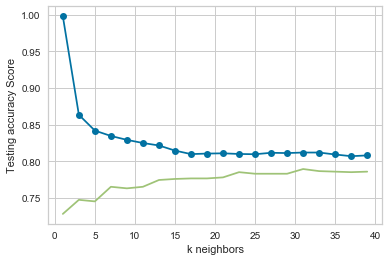

In [13]:
# K-nearest neighbor

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in np.arange(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.775


In [15]:
k = 13

# weight_options = ['uniform', 'distance']
# param_grid = dict(n_neighbors=k, weights=weight_options)
# print(param_grid)

# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# grid.fit(X, y)

# clf = sklearn.grid_search.GridSearchCV(knn,parameters,cv=10)


param_grid_knn = dict(n_neighbors=k)
# param_grid
param_grid_knn = {"n_neighbors": k}
grid_knn = GridSearchCV(knn, param_grid_knn, verbose=0)
# # grid_knn

ValueError: Parameter values for parameter (n_neighbors) need to be a sequence(but not a string) or np.ndarray.

In [16]:
# Make predictions with the hypertuned model
grid_knn.fit(X_train, y_train)
predictions = grid_knn.predict(X_test)

NameError: name 'grid_knn' is not defined

In [17]:
# Neural Networks
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

Using TensorFlow backend.


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [18]:
from keras.models import Sequential

model = Sequential()

In [19]:
from keras.layers import Dense
number_inputs = 26
number_hidden_nodes = 75
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=X_train.shape[1]))

In [20]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 75)                2025      
_________________________________________________________________
dense_2 (Dense)              (None, 75)                5700      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 152       
Total params: 7,877
Trainable params: 7,877
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Fit (train) the model
model.fit(
    X_train,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    verbose=0
)

In [23]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.6342748721271182, Accuracy: 0.7519545126401879


In [24]:
#Random Forest Classifier 

target_result=telcom["Churn"]
telcom = telcom.drop(["customerID"], axis = 1 )
# target names 
telcom= telcom.drop(["Churn"],axis =1) 
target_names =["churn", "no churn"]
feature_names=telcom.columns
# feature_names
telcom.nunique()

gender                                        2
SeniorCitizen                                 2
Partner                                       2
Dependents                                    2
PhoneService                                  2
MultipleLines                                 2
OnlineSecurity                                2
OnlineBackup                                  2
DeviceProtection                              2
TechSupport                                   2
StreamingTV                                   2
StreamingMovies                               2
PaperlessBilling                              2
InternetService_DSL                           2
InternetService_Fiber optic                   2
InternetService_No                            2
Contract_Month-to-month                       2
Contract_One year                             2
Contract_Two year                             2
PaymentMethod_Bank transfer (automatic)       2
PaymentMethod_Credit card (automatic)   

In [25]:
X_train, X_test, y_train, y_test = train_test_split(telcom, target_result, random_state=111)

In [26]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(telcom, target_result)
clf.score(X_test, y_test)
# telcom

0.9982935153583617

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(telcom, target_result)
# telcom.head()
feature_names

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [28]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.18807793258781988, 'TotalCharges'),
 (0.1685904387635078, 'MonthlyCharges'),
 (0.15392111021803642, 'tenure'),
 (0.06816691985747815, 'Contract_Month-to-month'),
 (0.03866567654177929, 'InternetService_Fiber optic'),
 (0.03417340869063263, 'PaymentMethod_Electronic check'),
 (0.028679186425957664, 'gender'),
 (0.025484310573474497, 'PaperlessBilling'),
 (0.02303603465635097, 'Partner'),
 (0.02283041822053059, 'OnlineSecurity'),
 (0.02199597630792418, 'SeniorCitizen'),
 (0.021259877148234293, 'Contract_Two year'),
 (0.020662665011610574, 'MultipleLines'),
 (0.0204805477560825, 'OnlineBackup'),
 (0.019548739456653596, 'Dependents'),
 (0.01927044877914627, 'DeviceProtection'),
 (0.018927109510197545, 'TechSupport'),
 (0.017796791285528368, 'StreamingMovies'),
 (0.01739126020721396, 'StreamingTV'),
 (0.012203120809689627, 'InternetService_No'),
 (0.011748401739163835, 'PaymentMethod_Bank transfer (automatic)'),
 (0.01172635612865885, 'PaymentMethod_Credit card (automatic)'),
 (0.011144

In [29]:
from sklearn.metrics import classification_report

predictions = rf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

       churn       0.82      0.91      0.86      1268
    no churn       0.67      0.48      0.56       490

   micro avg       0.79      0.79      0.79      1758
   macro avg       0.75      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



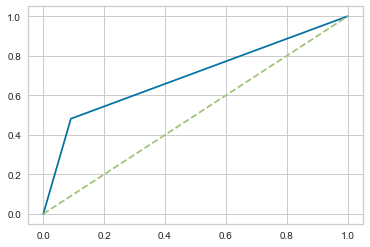

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score 
#get predicted probabilities 
false_positive_rate, true_positive_rate, treshold = roc_curve(y_test,predictions)

#plot ROC curve 
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],ls="--")

In [31]:
#SVM Model
# Support vector machine linear classifier
from sklearn.svm import SVC 
modelsvc = SVC(kernel='linear')
modelsvc.fit(telcom, target_result)
predictionssvc = modelsvc.predict(X_test)

In [32]:
# Model Accuracy
print('Test Acc: %.3f' % modelsvc.score(X_test, y_test))

Test Acc: 0.796


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictionssvc,
                            target_names=["churn", "no churn"]))

              precision    recall  f1-score   support

       churn       0.83      0.90      0.86      1268
    no churn       0.67      0.54      0.60       490

   micro avg       0.80      0.80      0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758



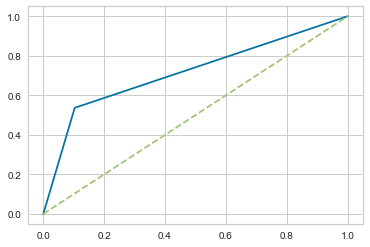

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score 
#get predicted probabilities 
false_positive_rate, true_positive_rate, treshold = roc_curve(y_test,predictionssvc)

#plot ROC curve 
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],ls="--")

In [35]:
#Xg Boosted trees 
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(telcom, target_result, random_state=7)
modelxgbc = XGBClassifier()
modelxgbc.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'